In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
obes_data = pd.read_csv('/kaggle/input/obesity-prediction-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

# **EDA**

In [239]:
obes_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [240]:
obes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [241]:
obes_data.rename(columns = {'family_history_with_overweight':'fam_hist'},inplace = True)

In [242]:
obes_data['fam_hist'].unique()

array(['yes', 'no'], dtype=object)

In [243]:
obes_data['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [244]:
obes_data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [245]:
obes_data['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [246]:
obes_data['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [247]:
yes_no_map = {'yes':1, 'no':0}
col = ['fam_hist','FAVC','SMOKE','SCC']

for column in col:
    obes_data[column] = obes_data[column].str.lower().map(yes_no_map)

obes_data

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,1,0,2.0,3.0,Sometimes,0,2.00,0,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,1,0,3.0,3.0,Sometimes,1,3.00,1,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,1,0,2.0,3.0,Sometimes,0,2.00,0,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,0,0,3.0,3.0,Sometimes,0,2.00,0,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,0,0,2.0,1.0,Sometimes,0,2.00,0,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3.0,3.0,Sometimes,0,1.73,0,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,1,1,3.0,3.0,Sometimes,0,2.01,0,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,1,1,3.0,3.0,Sometimes,0,2.05,0,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,1,1,3.0,3.0,Sometimes,0,2.85,0,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [248]:
caec_map = {'sometimes':1, 'frequently':2, 'always':3, 'no':0}
obes_data['CAEC'] = obes_data['CAEC'].str.lower().map(caec_map)
obes_data['CALC'] = obes_data['CALC'].str.lower().map(caec_map)
obes_data

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,1,0,2.0,3.0,1,0,2.00,0,0.00,1.000,0,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,1,0,3.0,3.0,1,1,3.00,1,3.00,0.000,1,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,1,0,2.0,3.0,1,0,2.00,0,2.00,1.000,2,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,0,0,3.0,3.0,1,0,2.00,0,2.00,0.000,2,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,0,0,2.0,1.0,1,0,2.00,0,0.00,0.000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3.0,3.0,1,0,1.73,0,1.68,0.906,1,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,1,1,3.0,3.0,1,0,2.01,0,1.34,0.599,1,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,1,1,3.0,3.0,1,0,2.05,0,1.41,0.646,1,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,1,1,3.0,3.0,1,0,2.85,0,1.14,0.586,1,Public_Transportation,Obesity_Type_III


In [249]:
obes_data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [250]:
obes_data.rename(columns = {'NObeyesdad':'Result'},inplace = True)

In [251]:
obes_data

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result
0,Female,21,1.62,64.00,1,0,2.0,3.0,1,0,2.00,0,0.00,1.000,0,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,1,0,3.0,3.0,1,1,3.00,1,3.00,0.000,1,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,1,0,2.0,3.0,1,0,2.00,0,2.00,1.000,2,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,0,0,3.0,3.0,1,0,2.00,0,2.00,0.000,2,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,0,0,2.0,1.0,1,0,2.00,0,0.00,0.000,1,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3.0,3.0,1,0,1.73,0,1.68,0.906,1,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,1,1,3.0,3.0,1,0,2.01,0,1.34,0.599,1,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,1,1,3.0,3.0,1,0,2.05,0,1.41,0.646,1,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,1,1,3.0,3.0,1,0,2.85,0,1.14,0.586,1,Public_Transportation,Obesity_Type_III


In [252]:
obes_data['Result'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [253]:
for val in obes_data['Result'].unique():
    print(f"'{val}'")

'Normal_Weight'
'Overweight_Level_I'
'Overweight_Level_II'
'Obesity_Type_I'
'Insufficient_Weight'
'Obesity_Type_II'
'Obesity_Type_III'


In [254]:
obes_data['Result'] = obes_data['Result'].astype(str).str.strip().str.replace('\n', '', regex=True).str.replace('\r', '', regex=True)

print(obes_data['Result'].unique())

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [255]:
obes_mapping = {
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Insufficient_Weight': 0,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

In [256]:
obes_data['Result'] = obes_data['Result'].replace(obes_mapping)

<ipython-input-256-3187de3475fa>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  obes_data['Result'] = obes_data['Result'].replace(obes_mapping)


In [257]:
obes_data

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result
0,Female,21,1.62,64.00,1,0,2.0,3.0,1,0,2.00,0,0.00,1.000,0,Public_Transportation,1
1,Female,21,1.52,56.00,1,0,3.0,3.0,1,1,3.00,1,3.00,0.000,1,Public_Transportation,1
2,Male,23,1.80,77.00,1,0,2.0,3.0,1,0,2.00,0,2.00,1.000,2,Public_Transportation,1
3,Male,27,1.80,87.00,0,0,3.0,3.0,1,0,2.00,0,2.00,0.000,2,Walking,2
4,Male,22,1.78,89.80,0,0,2.0,1.0,1,0,2.00,0,0.00,0.000,1,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3.0,3.0,1,0,1.73,0,1.68,0.906,1,Public_Transportation,6
2107,Female,22,1.75,133.74,1,1,3.0,3.0,1,0,2.01,0,1.34,0.599,1,Public_Transportation,6
2108,Female,23,1.75,133.69,1,1,3.0,3.0,1,0,2.05,0,1.41,0.646,1,Public_Transportation,6
2109,Female,24,1.74,133.35,1,1,3.0,3.0,1,0,2.85,0,1.14,0.586,1,Public_Transportation,6


In [258]:
obes_data['Result'].unique()

array([1, 2, 3, 4, 0, 5, 6])

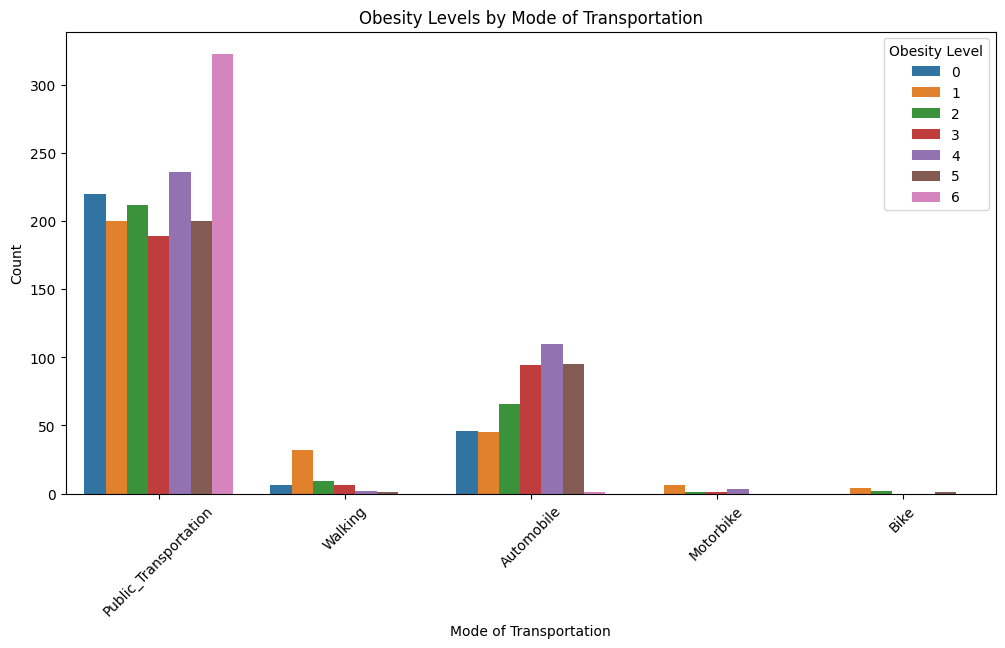

In [259]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MTRANS', hue='Result', data=obes_data)
plt.title('Obesity Levels by Mode of Transportation')
plt.xlabel('Mode of Transportation')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.xticks(rotation=45)
plt.show()

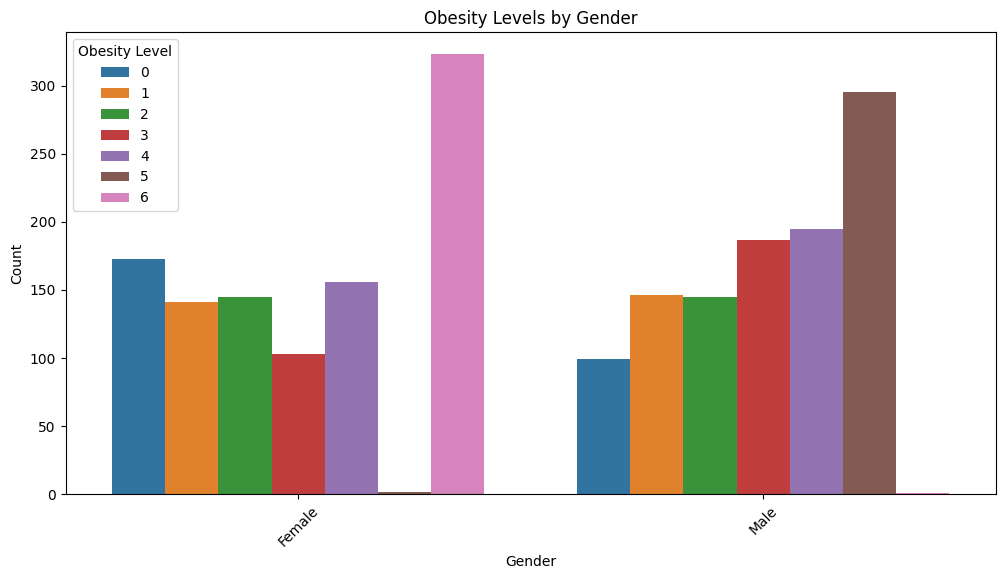

In [260]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Result', data=obes_data)
plt.title('Obesity Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Obesity Level')
plt.xticks(rotation=45)
plt.show()

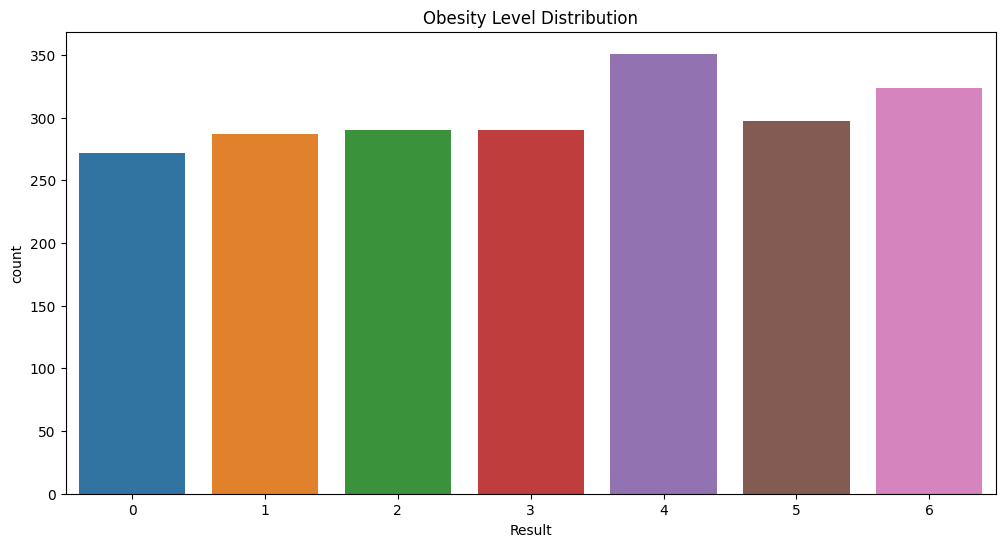

In [261]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Result', data=obes_data)
plt.title('Obesity Level Distribution')
plt.show()

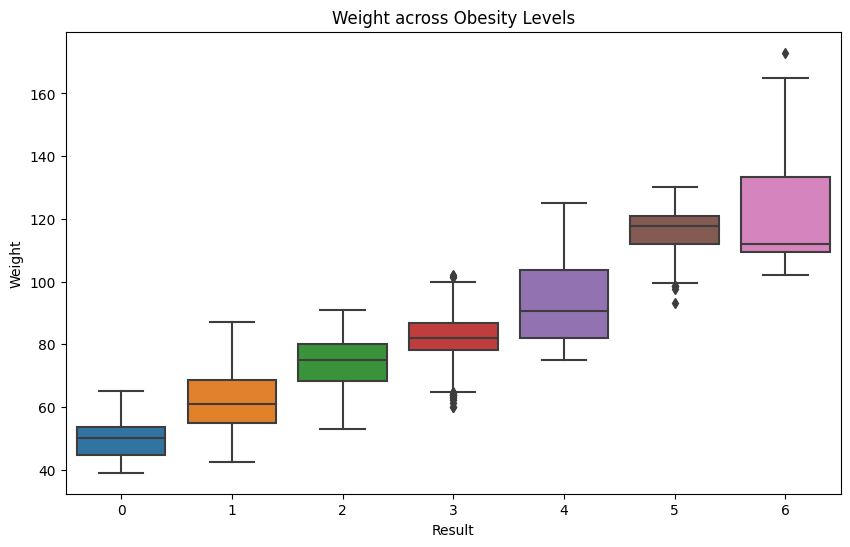

In [262]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Result', y='Weight', data=obes_data)
plt.title('Weight across Obesity Levels')
plt.show()

In [263]:
numeric_cols = obes_data.select_dtypes(include='number').columns
categorical_cols = obes_data.select_dtypes(include='object').columns

In [264]:
obes_data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [265]:
obes_data['Gender'] = obes_data['Gender'].map({'Male': 1, 'Female': 0})

**Target Encoding for mean of transportation column:**

In [266]:
print(obes_data.groupby('MTRANS')['Result'].mean())

MTRANS
Automobile               3.019694
Bike                     1.857143
Motorbike                2.090909
Public_Transportation    3.210759
Walking                  1.446429
Name: Result, dtype: float64


In [267]:
trans_encoding = {
    'Walking': 1.45,
    'Bike': 1.86,
    'Motorbike': 2.09,
    'Automobile': 3.02,
    'Public_Transportation': 3.21
}
obes_data['MTRANS'] = obes_data['MTRANS'].map(trans_encoding)

In [268]:
obes_data

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result
0,0,21,1.62,64.00,1,0,2.0,3.0,1,0,2.00,0,0.00,1.000,0,3.21,1
1,0,21,1.52,56.00,1,0,3.0,3.0,1,1,3.00,1,3.00,0.000,1,3.21,1
2,1,23,1.80,77.00,1,0,2.0,3.0,1,0,2.00,0,2.00,1.000,2,3.21,1
3,1,27,1.80,87.00,0,0,3.0,3.0,1,0,2.00,0,2.00,0.000,2,1.45,2
4,1,22,1.78,89.80,0,0,2.0,1.0,1,0,2.00,0,0.00,0.000,1,3.21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,1,3.0,3.0,1,0,1.73,0,1.68,0.906,1,3.21,6
2107,0,22,1.75,133.74,1,1,3.0,3.0,1,0,2.01,0,1.34,0.599,1,3.21,6
2108,0,23,1.75,133.69,1,1,3.0,3.0,1,0,2.05,0,1.41,0.646,1,3.21,6
2109,0,24,1.74,133.35,1,1,3.0,3.0,1,0,2.85,0,1.14,0.586,1,3.21,6


In [269]:
obes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    2111 non-null   int64  
 1   Age       2111 non-null   int64  
 2   Height    2111 non-null   float64
 3   Weight    2111 non-null   float64
 4   fam_hist  2111 non-null   int64  
 5   FAVC      2111 non-null   int64  
 6   FCVC      2111 non-null   float64
 7   NCP       2111 non-null   float64
 8   CAEC      2111 non-null   int64  
 9   SMOKE     2111 non-null   int64  
 10  CH2O      2111 non-null   float64
 11  SCC       2111 non-null   int64  
 12  FAF       2111 non-null   float64
 13  TUE       2111 non-null   float64
 14  CALC      2111 non-null   int64  
 15  MTRANS    2111 non-null   float64
 16  Result    2111 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 280.5 KB


In [270]:
obes_data.describe()

,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Result
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.315964,1.701620,86.586035,0.817622,0.883941,2.418986,2.685651,1.140692,0.020843,2.008053,0.045476,1.010313,0.657861,0.731407,3.111866,3.112269
std,0.500083,6.357078,0.093368,26.191163,0.386247,0.320371,0.533996,0.778079,0.468543,0.142893,0.612950,0.208395,0.850613,0.608926,0.515498,0.304928,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.450000,0.000000
25%,0.000000,20.000000,1.630000,65.470000,1.000000,1.000000,2.000000,2.660000,1.000000,0.000000,1.585000,0.000000,0.125000,0.000000,0.000000,3.020000,1.000000
50%,1.000000,23.000000,1.700000,83.000000,1.000000,1.000000,2.390000,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625000,1.000000,3.210000,3.000000
75%,1.000000,26.000000,1.770000,107.430000,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.480000,0.000000,1.670000,1.000000,1.000000,3.210000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.210000,6.000000


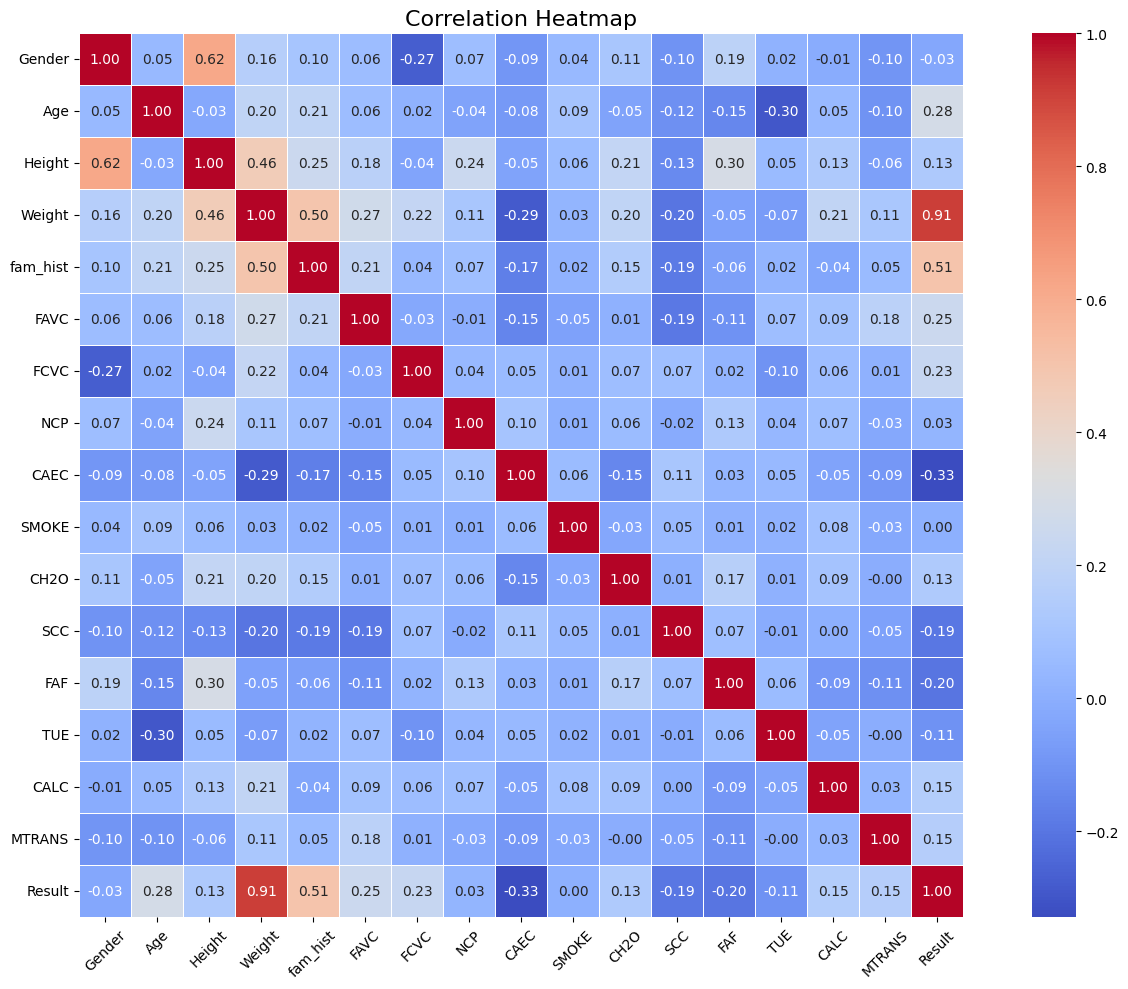

In [271]:
corr_matrix = obes_data.corr()

plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# **Feature Selection**

In [272]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [273]:
selector = RFE(RandomForestClassifier(), n_features_to_select=15)
selector = selector.fit(X, y)

selected_features = X.columns[selector.support_]
print("Selected features:", list(selected_features))

Selected features: ['Gender', 'Age', 'Height', 'Weight', 'fam_hist', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']


In [274]:
X_f = X[selected_features].copy()
X_f.head()


,Gender,Age,Height,Weight,fam_hist,FAVC,FCVC,NCP,CAEC,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21,1.62,64.0,1,0,2.0,3.0,1,2.0,0,0.0,1.0,0,3.21
1,0,21,1.52,56.0,1,0,3.0,3.0,1,3.0,1,3.0,0.0,1,3.21
2,1,23,1.80,77.0,1,0,2.0,3.0,1,2.0,0,2.0,1.0,2,3.21
3,1,27,1.80,87.0,0,0,3.0,3.0,1,2.0,0,2.0,0.0,2,1.45
4,1,22,1.78,89.8,0,0,2.0,1.0,1,2.0,0,0.0,0.0,1,3.21


# **ML Model Implementation**

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [276]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from sklearn.model_selection import train_test_split

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [278]:
X = obes_data.drop('Result', axis = 1)
y = obes_data['Result']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
X_f_train, X_f_test, y_train, y_test = train_test_split(X_f, y, stratify=y, random_state=42)

In [280]:
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    print(f"\n🔹 {name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"🔹 Classification Report:\n{classification_report(y_test, y_pred)}")
    # cm = confusion_matrix(y_test, y_pred)
    # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    # plt.title(f'{name} Confusion Matrix')
    # plt.xlabel('Predicted')
    # plt.ylabel('Actual')
    # plt.show()

**Logistic Regression**

In [281]:
lr = LogisticRegression(multi_class='multinomial', max_iter=2000)
lr.fit(X_train, y_train)
evaluate_model(lr, X_test, y_test, "Logistic Regression")

lr.fit(X_f_train, y_train)
evaluate_model(lr, X_f_test, y_test, "Logistic Regression (Selected Features)")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔹 Logistic Regression Accuracy: 0.8258
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        68
           1       0.76      0.67      0.71        72
           2       0.73      0.75      0.74        73
           3       0.74      0.68      0.71        72
           4       0.81      0.82      0.81        88
           5       0.87      0.97      0.92        74
           6       0.98      0.99      0.98        81

    accuracy                           0.83       528
   macro avg       0.82      0.82      0.82       528
weighted avg       0.82      0.83      0.82       528


🔹 Logistic Regression (Selected Features) Accuracy: 0.8428
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.78      0.71      0.74        72
           2       0.75      0.78      0.77        73
           3       0.78      0.68   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [282]:
rf = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth = 5,
                            min_samples_leaf = 2, min_samples_split = 5)
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test, "Random Forest")

rf.fit(X_f_train, y_train)
evaluate_model(rf, X_f_test, y_test, "Random Forest (Feature Selection)")


🔹 Random Forest Accuracy: 0.8617
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.95        68
           1       0.75      0.88      0.81        72
           2       0.83      0.67      0.74        73
           3       0.75      0.76      0.76        72
           4       0.83      0.84      0.84        88
           5       0.91      0.97      0.94        74
           6       0.99      0.99      0.99        81

    accuracy                           0.86       528
   macro avg       0.86      0.86      0.86       528
weighted avg       0.86      0.86      0.86       528


🔹 Random Forest (Feature Selection) Accuracy: 0.8636
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.79      0.88      0.83        72
           2       0.81      0.70      0.75        73
           3       0.78      0.72      0.75     

**KNN**

In [283]:
knn = KNeighborsClassifier(n_neighbors=5,weights='distance',algorithm='auto',p=2,metric='minkowski')

knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test, "KNN")

knn.fit(X_f_train, y_train)
evaluate_model(knn, X_f_test, y_test, "KNN (Feature Selection)")


🔹 KNN Accuracy: 0.8883
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.96      0.67      0.79        72
           2       0.79      0.93      0.86        73
           3       0.85      0.78      0.81        72
           4       0.84      0.92      0.88        88
           5       0.95      0.96      0.95        74
           6       0.98      0.99      0.98        81

    accuracy                           0.89       528
   macro avg       0.89      0.89      0.88       528
weighted avg       0.89      0.89      0.89       528


🔹 KNN (Feature Selection) Accuracy: 0.8864
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.96      0.67      0.79        72
           2       0.79      0.92      0.85        73
           3       0.84      0.78      0.81        72
           4  

In [284]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate=0.05,
    max_depth=2, n_estimators=300, subsample=0.7, colsample_bytree=0.7, min_child_weight=3,
    gamma=0.2, reg_lambda=2, reg_alpha=2, random_state=42)

xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test, "XGBoost")

xgb.fit(X_f_train, y_train)
evaluate_model(xgb, X_f_test, y_test, "XGB (Feature Selection)")


🔹 XGBoost Accuracy: 0.9375
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.86      0.93      0.89        72
           2       0.88      0.84      0.86        73
           3       0.94      0.89      0.91        72
           4       0.92      1.00      0.96        88
           5       0.99      0.97      0.98        74
           6       1.00      0.99      0.99        81

    accuracy                           0.94       528
   macro avg       0.94      0.93      0.94       528
weighted avg       0.94      0.94      0.94       528


🔹 XGB (Feature Selection) Accuracy: 0.9318
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.86      0.90      0.88        72
           2       0.86      0.84      0.85        73
           3       0.93      0.89      0.91        72
          

In [285]:
cb = CatBoostClassifier(iterations=270, learning_rate=0.043, depth=4, l2_leaf_reg=7,
    subsample=0.85, bootstrap_type='Bernoulli', eval_metric='Accuracy', od_type='Iter',
    od_wait=20, random_seed=42, verbose=0)

cb.fit(X_train, y_train)
evaluate_model(cb, X_test, y_test, "CatBoost")


cb.fit(X_f_train, y_train)
evaluate_model(cb, X_f_test, y_test, "CatBoost (Feature Selection)")


🔹 CatBoost Accuracy: 0.9299
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.85      0.92      0.88        72
           2       0.90      0.88      0.89        73
           3       0.94      0.89      0.91        72
           4       0.90      0.95      0.93        88
           5       0.96      0.95      0.95        74
           6       0.99      0.99      0.99        81

    accuracy                           0.93       528
   macro avg       0.93      0.93      0.93       528
weighted avg       0.93      0.93      0.93       528


🔹 CatBoost (Feature Selection) Accuracy: 0.9337
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        68
           1       0.84      0.93      0.88        72
           2       0.90      0.86      0.88        73
           3       0.95      0.88      0.91        72
    

In [286]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_split=5, min_samples_leaf=5,
                            max_features='sqrt',random_state=42)

dt.fit(X_train, y_train)
evaluate_model(dt, X_test, y_test, "Decision Tree")

dt.fit(X_f_train, y_train)
evaluate_model(dt, X_f_test, y_test, "Decision Tree (Feature Selection)")


🔹 Decision Tree Accuracy: 0.7178
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        68
           1       0.50      0.54      0.52        72
           2       0.68      0.55      0.61        73
           3       0.47      0.79      0.59        72
           4       0.85      0.60      0.71        88
           5       0.98      0.77      0.86        74
           6       0.99      0.98      0.98        81

    accuracy                           0.72       528
   macro avg       0.75      0.72      0.72       528
weighted avg       0.76      0.72      0.73       528


🔹 Decision Tree (Feature Selection) Accuracy: 0.6742
🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        68
           1       0.59      0.51      0.55        72
           2       0.53      0.56      0.54        73
           3       0.49      0.47      0.48     